In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Load the dataset
data = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

# Convert 'Year' column to numeric format
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)

# Convert 'Duration' column to numeric format
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)

# Convert 'Votes' column to numeric format, replacing non-convertible values with NaN
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# Display the first few rows of the dataset to confirm the changes
print(data.head())

                                 Name    Year  Duration            Genre  \
0                                         NaN       NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0            Drama   
2                         #Homecoming  2021.0      90.0   Drama, Musical   
3                             #Yaaram  2019.0     110.0  Comedy, Romance   
4                   ...And Once Again  2010.0     105.0            Drama   

   Rating  Votes            Director       Actor 1             Actor 2  \
0     NaN    NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0    8.0       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN    NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4   35.0          Ovais Khan       Prateik          Ishita Raj   
4     NaN    NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Ka

In [13]:
# Data preprocessing
# Remove rows with missing values
data.dropna(inplace=True)

# Feature engineering
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

# Splitting the dataset into features and target variable
X = data.drop(['Name', 'Rating'], axis=1)
y = data['Rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
# Predicting on the testing set
y_pred = model.predict(X_test)

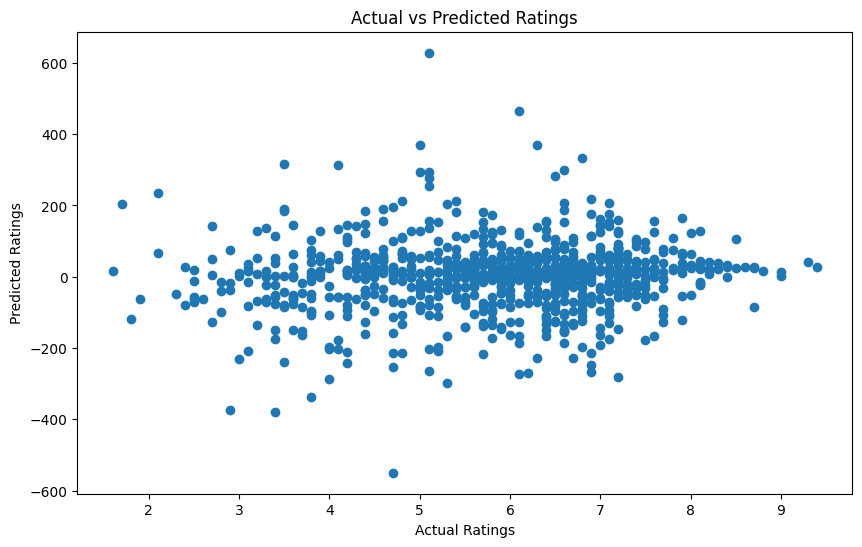

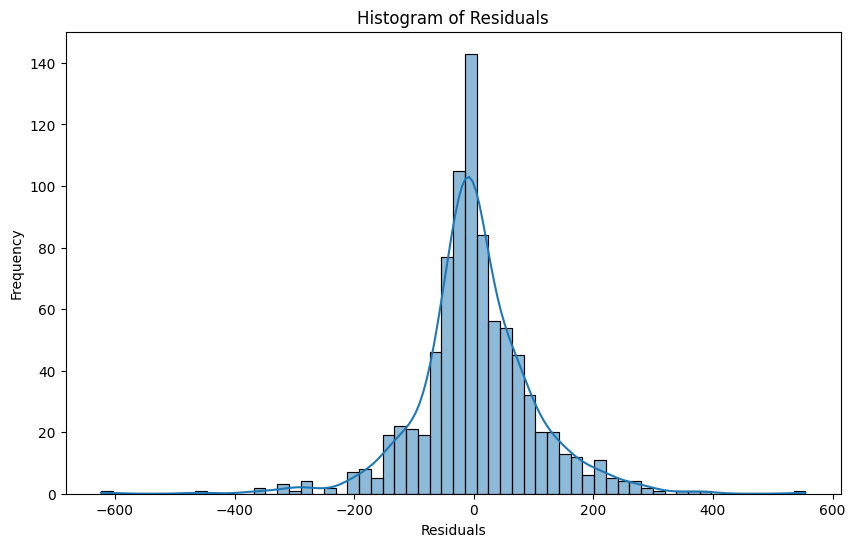

In [16]:
# Visualizing results
# Scatter plot of actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [18]:
# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 9776.267555086344
R-squared: -4937.966008933633
